In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train=pd.read_csv('train_spt.csv')

In [3]:
test=pd.read_csv('test_spt.csv')

In [4]:
sample=pd.read_csv('sample_submission.csv')

In [5]:
sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<AxesSubplot:>

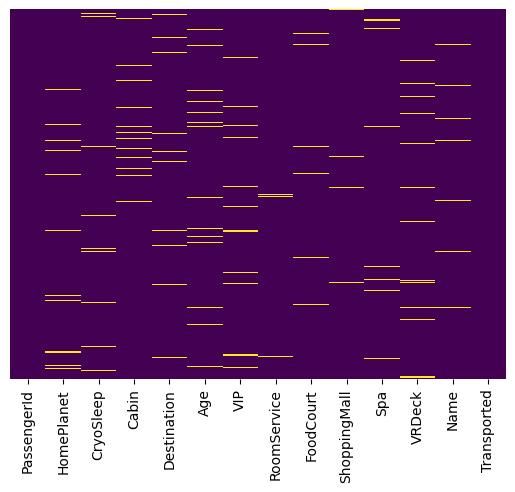

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


In [13]:
train['VIP']=train['VIP'].astype('boolean')

In [14]:
train['CryoSleep']=train['CryoSleep'].astype('boolean')

<AxesSubplot:>

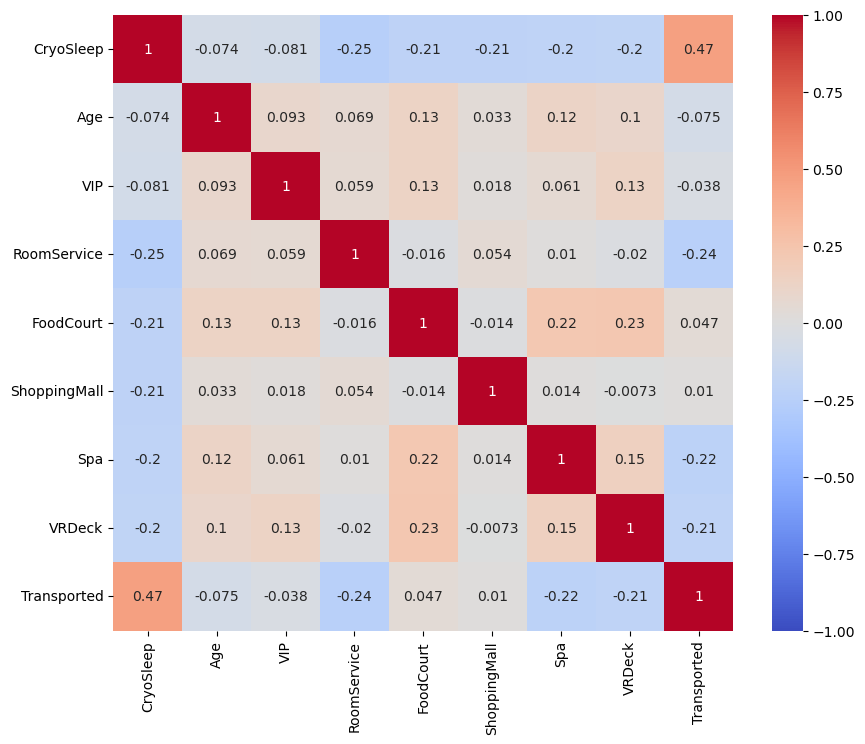

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

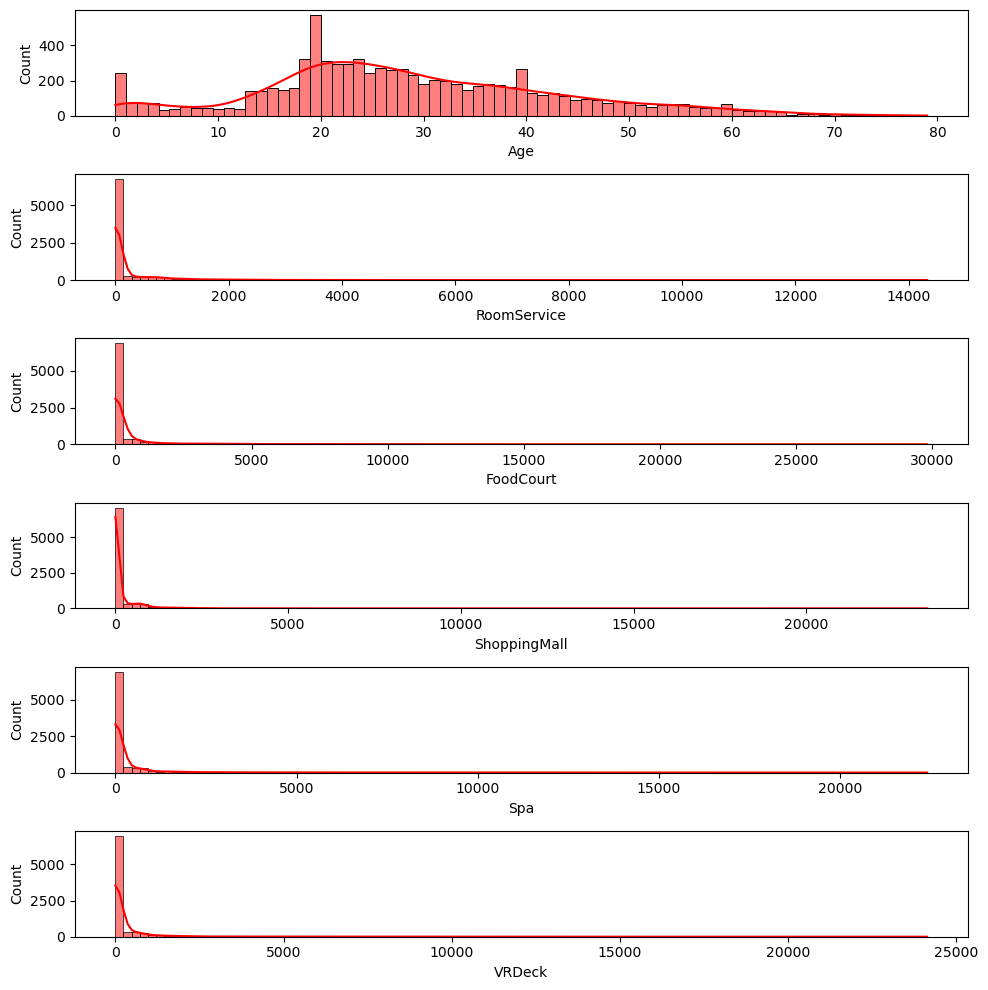

In [16]:
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
sns.histplot(train['Age'],color='red',bins=75,ax=ax[0],kde=True)
sns.histplot(train['RoomService'],color='red',bins=100,ax=ax[1],kde=True)
sns.histplot(train['FoodCourt'],color='red',bins=100,ax=ax[2],kde=True)
sns.histplot(train['ShoppingMall'],color='red',bins=100,ax=ax[3],kde=True)
sns.histplot(train['Spa'],color='red',bins=100,ax=ax[4],kde=True)
sns.histplot(train['VRDeck'],color='red',bins=100,ax=ax[5],kde=True)
plt.tight_layout()


<AxesSubplot:xlabel='HomePlanet', ylabel='RoomService'>

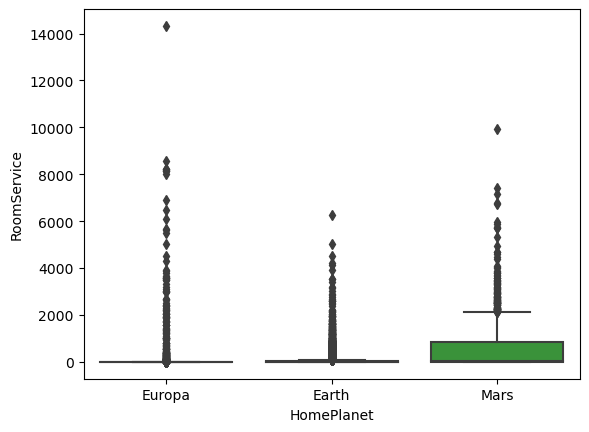

In [17]:
sns.boxplot(data=train,x='HomePlanet',y='RoomService')

<AxesSubplot:xlabel='Destination', ylabel='RoomService'>

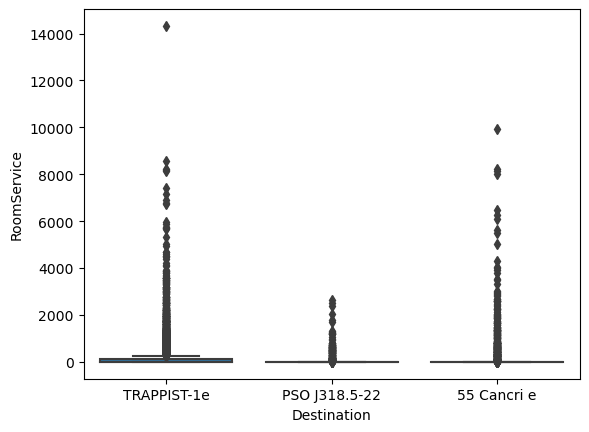

In [18]:
sns.boxplot(data=train,x='Destination',y='RoomService')

In [19]:
train[train['ShoppingMall']>8000].ShoppingMall.count()

5

In [20]:
train_demo=train

In [21]:
train_demo.shape

(8693, 14)

We need to 0)decide the order of 1 and 2 1)deal with outlier data 2)null values 

In [22]:
#train_dropped_outliers=train_dropped_outliers[train_dropped_outliers['VRDeck']<8000]
#train_dropped_outliers=train_dropped_outliers[train_dropped_outliers['Spa']<8000]
#train_dropped_outliers=train_dropped_outliers[train_dropped_outliers['FoodCourt']<8000]
#train_dropped_outliers=train_dropped_outliers[train_dropped_outliers['RoomService']<8000]
#train_dropped_outliers=train_dropped_outliers[train_dropped_outliers['ShoppingMall']<8000]

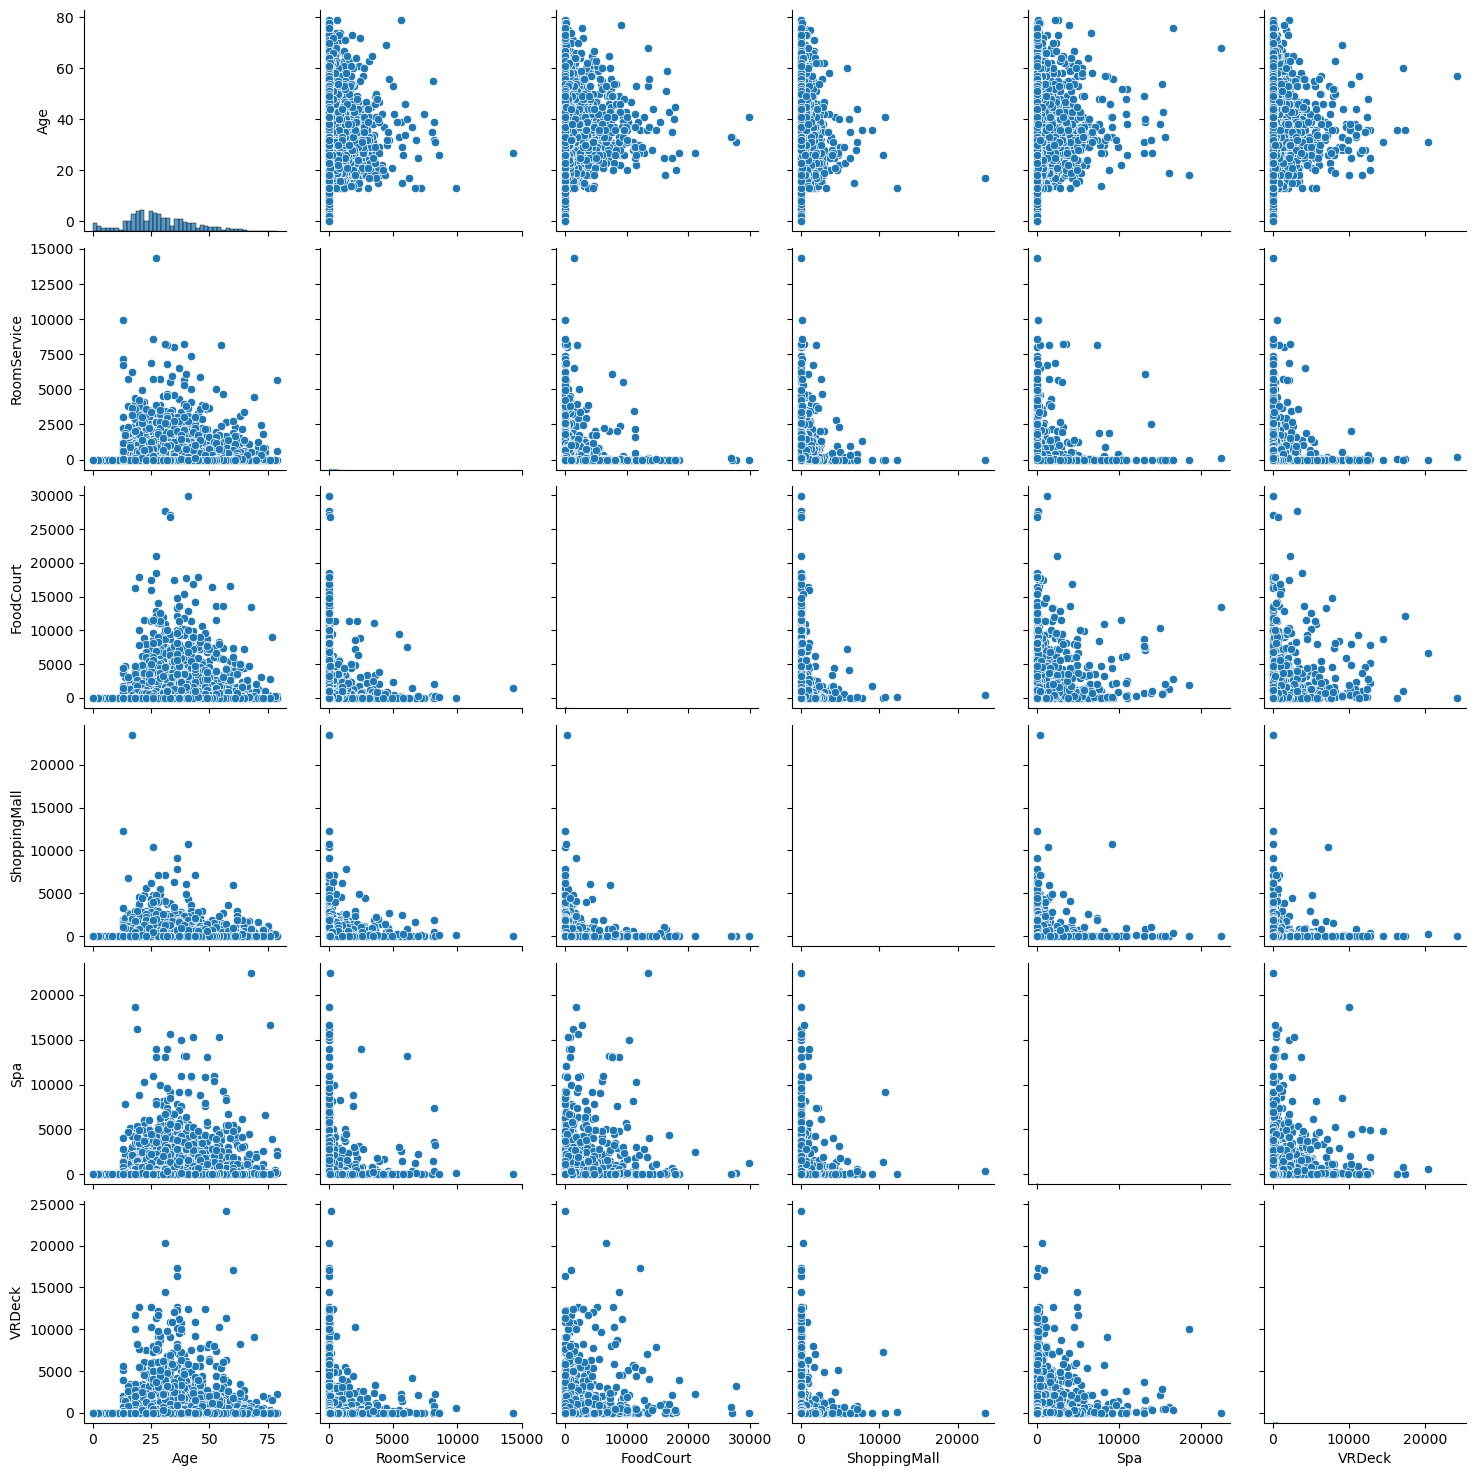

In [23]:
sns.pairplot(train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

im gonna fill null values on basis of age....for cyro-Imputing missing values based on the class distribution 

In [24]:
class_distribution=train_demo['CryoSleep'].value_counts(normalize=True)

In [25]:
train_demo['CryoSleep'].fillna(pd.Series(np.random.choice(class_distribution.index, size=len(train_demo)),
                                 index=train_demo.index), inplace=True)

In [26]:
train_demo.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [27]:
train_demo.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
train_demo['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [29]:
train_demo['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

imputation with median

In [30]:
median_age=train_demo['Age'].median()

In [31]:
train_demo['Age'].fillna(median_age,inplace=True)

Homeplanet time

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

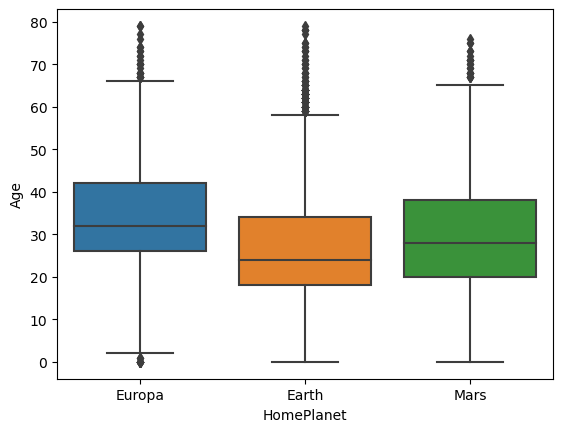

In [32]:
sns.boxplot(data=train_demo,x='HomePlanet',y='Age')

In [33]:
print(train_demo.groupby('HomePlanet')['Age'].median())

HomePlanet
Earth     24.0
Europa    32.0
Mars      28.0
Name: Age, dtype: float64


In [34]:
df=train_demo

In [35]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [36]:
median_ages_based_on_homeplanet = {
    'Europa': 32.0,
    'Earth': 24.0,
    'Mars': 28.0
}

In [37]:
for index, row in df.iterrows():
    if pd.isna(row['HomePlanet']):
        df.at[index, 'HomePlanet'] = min(median_ages_based_on_homeplanet, 
                                                 key=lambda key: abs(median_ages_based_on_homeplanet[key] - row['Age']))

In [38]:
print(df.groupby('HomePlanet')['Age'].median())

HomePlanet
Earth     24.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64


In [39]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Destination using most frequent

In [40]:
dest_cat_count=df['Destination'].value_counts()

In [41]:
most_frequent_category = dest_cat_count.idxmax()

In [42]:
df['Destination'].fillna(most_frequent_category, inplace=True)

In [43]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [44]:
train_demo2=df

cabin

In [45]:
train_demo2[['Cabin1','Cabin2','Cabin3']]=train_demo2['Cabin'].str.split('/', expand=True)

In [46]:
train_demo2.drop(columns=['Cabin'], inplace=True)

In [47]:
train_demo2.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [48]:
train_demo2.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Cabin1', 'Cabin2', 'Cabin3'],
      dtype='object')

In [49]:
order=['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Cabin1', 'Cabin2', 'Cabin3',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported']

In [50]:
train_demo2=train_demo2[order]

In [51]:
train_demo2['Cabin3'].unique()

array(['P', 'S', nan], dtype=object)

In [52]:
relative_frequencies = train_demo2['Cabin3'].value_counts(normalize=True)
missing_count = train_demo2['Cabin3'].isnull().sum()
random_values = np.random.choice(relative_frequencies.index, missing_count, p=relative_frequencies)
train_demo2.loc[train_demo2['Cabin3'].isnull(), 'Cabin3'] = random_values


In [53]:
train_demo2=train_demo2.drop(columns='Cabin2')

In [54]:
train_demo2.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
Cabin1          199
Cabin3            0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

deck

In [55]:
mode_value = train_demo2['Cabin1'].mode().values[0]
train_demo2['Cabin1'].fillna(mode_value, inplace=True)

In [56]:
train_demo2.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
Cabin1            0
Cabin3            0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

VIP

In [57]:
train_demo2['VIP'].fillna(False, inplace=True)

In [58]:
train_demo2.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Cabin1            0
Cabin3            0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [59]:
train_demo2=train_demo2.drop(columns='Name')

In [60]:
train_demo2.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Cabin1            0
Cabin3            0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

remaining

In [61]:
train_demo2['RoomService'].fillna(0, inplace=True)
train_demo2['FoodCourt'].fillna(0, inplace=True)
train_demo2['ShoppingMall'].fillna(0, inplace=True)
train_demo2['Spa'].fillna(0, inplace=True)
train_demo2['VRDeck'].fillna(0, inplace=True)


In [62]:
train_demo2.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
Cabin1          0
Cabin3          0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

### Dealing with outliers

transformation

In [66]:
train_demo2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_demo2[['RoomService','FoodCourt',
                                                                'ShoppingMall','Spa','VRDeck']].apply(lambda x: x + 1)

In [68]:
column=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in column:
    train_demo2[i] = np.log1p(train_demo2[i])

In [72]:
train_demo2.columns=['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'deck', 'side', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported']

In [98]:
train_demo2.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,deck,side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,B,P,0.693147,0.693147,0.693147,0.693147,0.693147,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,F,S,4.709530,2.397895,3.295837,6.311735,3.828641,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,A,S,3.806662,8.182559,0.693147,8.812397,3.931826,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,A,S,0.693147,7.158514,5.921578,8.111028,5.273000,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,F,S,5.720312,4.276666,5.030438,6.340359,1.386294,True


In [99]:
train_demo2=train_demo2.drop(columns='PassengerId')

In [100]:
train_demo2 = pd.get_dummies(train_demo2, columns=['HomePlanet','Destination'])


In [101]:
from sklearn.preprocessing import LabelEncoder

In [106]:
label_encoder = LabelEncoder()
train_demo2['deck'] = label_encoder.fit_transform(train_demo2['deck'])


In [107]:
train_demo2['side'] = label_encoder.fit_transform(train_demo2['side'])


<AxesSubplot:xlabel='Transported', ylabel='count'>

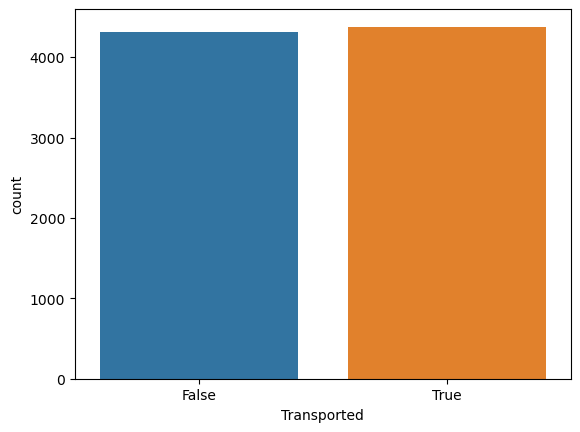

In [73]:
sns.countplot(x='Transported',data=train_demo2)

Model

In [109]:
from sklearn.model_selection import train_test_split

In [74]:
y=train_demo2['Transported']

In [110]:
X=train_demo2.drop(columns='Transported')

In [111]:
X.head()

,CryoSleep,Age,VIP,deck,side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,1,0,0.693147,0.693147,0.693147,0.693147,0.693147,0,1,0,0,0,1
1,False,24.0,False,5,1,4.709530,2.397895,3.295837,6.311735,3.828641,1,0,0,0,0,1
2,False,58.0,True,0,1,3.806662,8.182559,0.693147,8.812397,3.931826,0,1,0,0,0,1
3,False,33.0,False,0,1,0.693147,7.158514,5.921578,8.111028,5.273000,0,1,0,0,0,1
4,False,16.0,False,5,1,5.720312,4.276666,5.030438,6.340359,1.386294,1,0,0,0,0,1


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=101)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [139]:
rfc=RandomForestClassifier(n_estimators=100)

In [140]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [141]:
rfc_predict=rfc.predict(X_test)

In [142]:
from sklearn.metrics import classification_report,confusion_matrix

In [143]:
print(confusion_matrix(y_test,rfc_predict))
print(classification_report(y_test,rfc_predict))

[[883 205]
 [251 835]]
              precision    recall  f1-score   support

       False       0.78      0.81      0.79      1088
        True       0.80      0.77      0.79      1086

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



In [144]:
rfc.score(X_test, y_test)

0.7902483900643974